<h1>Introduction to Gradient Boosting</h1>

> Good references:
    * https://gabrieltseng.github.io/2018/02/25/XGB.html
    * on Taylor expansion and Gradient Descent : https://math.stackexchange.com/questions/2957673/second-order-taylor-series-terms-in-gradient-descent

In [2]:
import github_command as gt

In [25]:
gt.push(file_to_transfer="BONUS_Gradient_Boosting.ipynb",
       message="changed path for read-write gifs", 
       repos="TDs_ESILV.git")

In [26]:
gt.push(file_to_transfer="bonus_ressources_gradient_boosting/",
       message="updated ressources", 
       repos="TDs_ESILV.git")

In [27]:
gt.push(file_to_transfer="READMe.md",
       message="updated READMe", 
       repos="TDs_ESILV.git")

In [6]:
%matplotlib inline

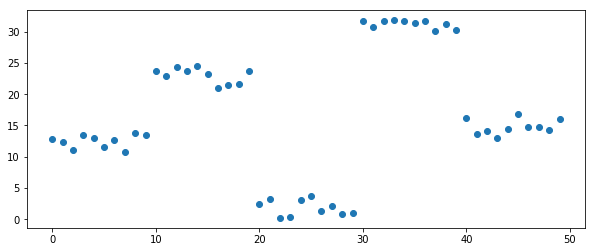

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.arange(0,50)
x = pd.DataFrame({'x':x})

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

plt.figure(figsize=(10,4))
plt.scatter(x,y)
plt.show()

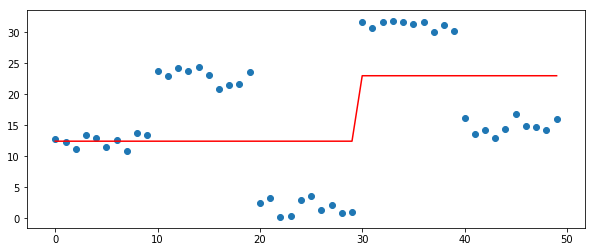

In [17]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=1)
model = clf.fit(x,y)
pred = model.predict(x)

plt.figure(figsize=(10,4))
plt.plot(x, pred, c='red')
plt.scatter(x,y)
plt.show()

In [18]:
clf.get_params()

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [19]:
!pip install pydotplus

<p>How to overcome the issue of graphViz executable not found <a href="https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4">here</a><p>

In [11]:
from IPython.display import Image

In [12]:
def create_tree_graph(clf_or_rlf):
    from sklearn.externals.six import StringIO  
    import pydotplus
    
    dot_data = StringIO()
    tree.export_graphviz(clf_or_rlf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names=x.columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    
    return graph.create_png()

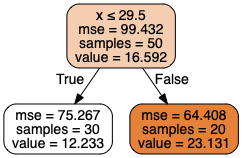

In [13]:
Image(create_tree_graph(clf), width=300)

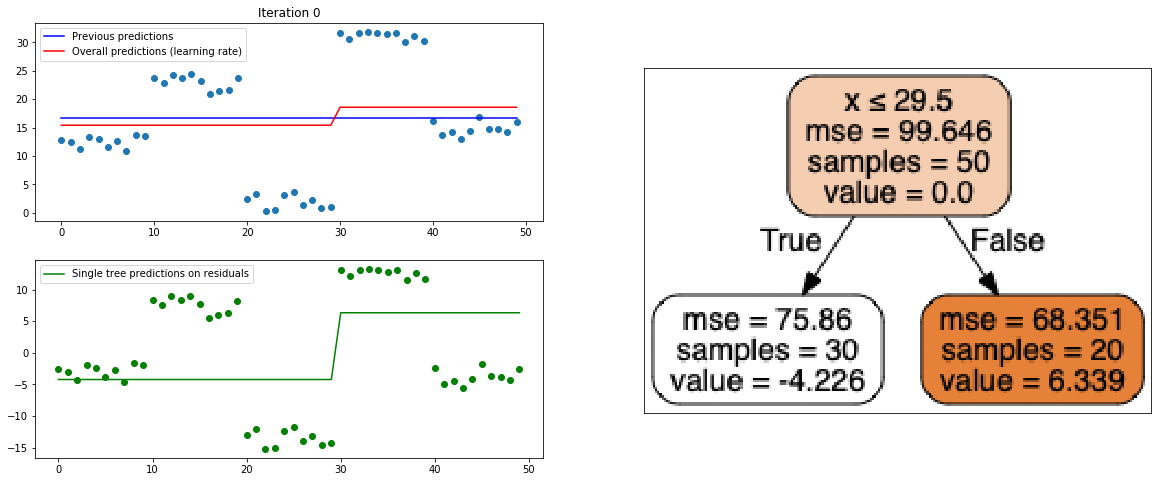

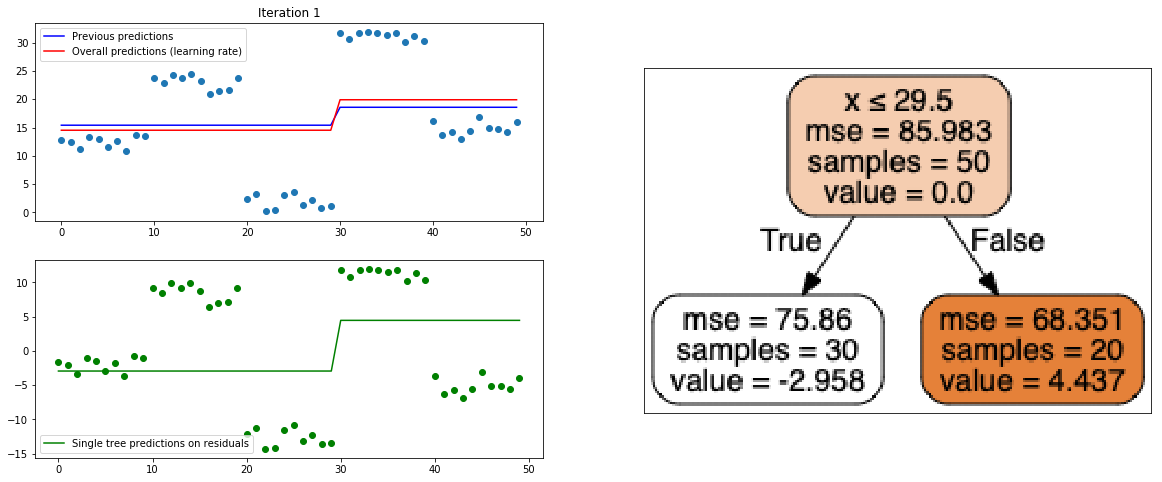

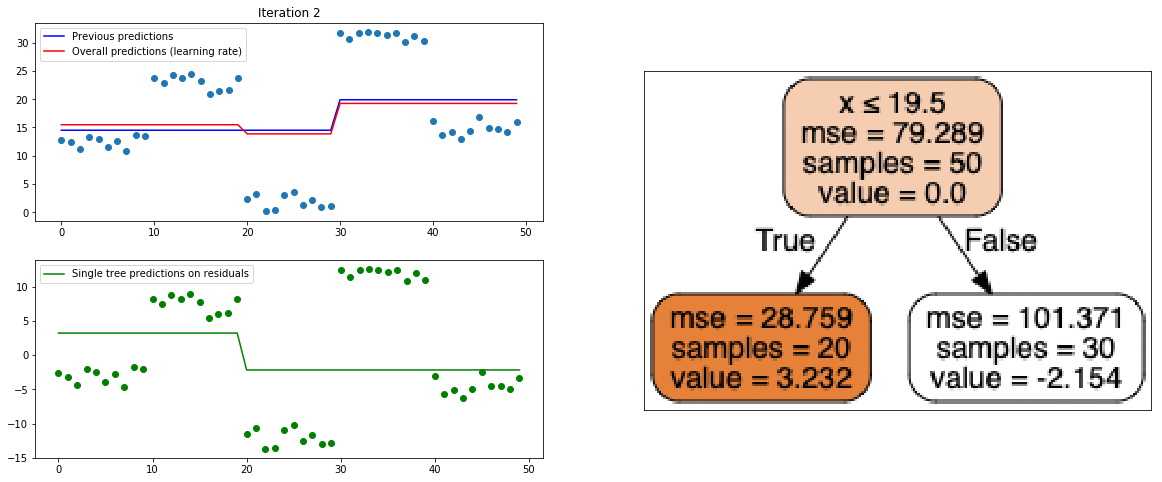

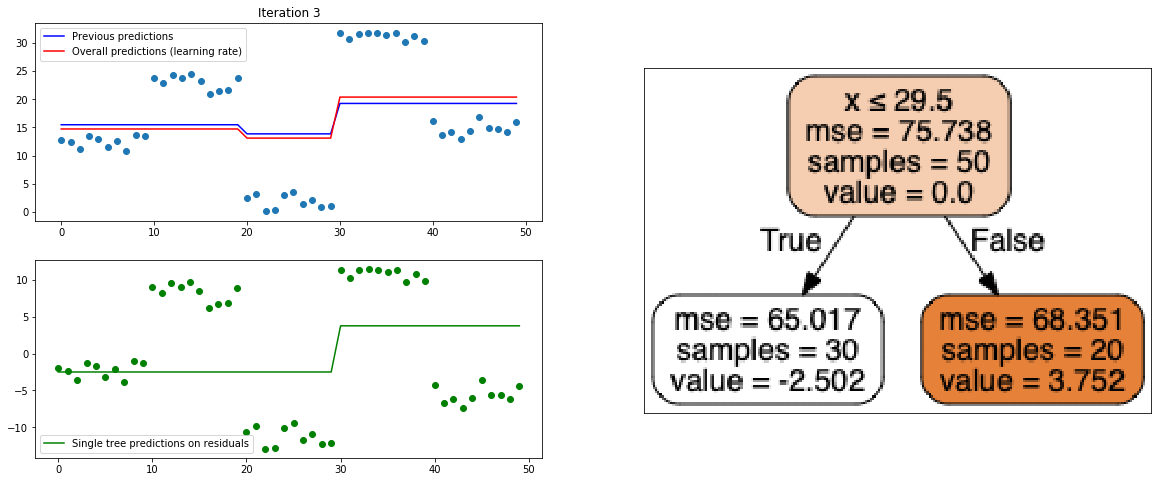

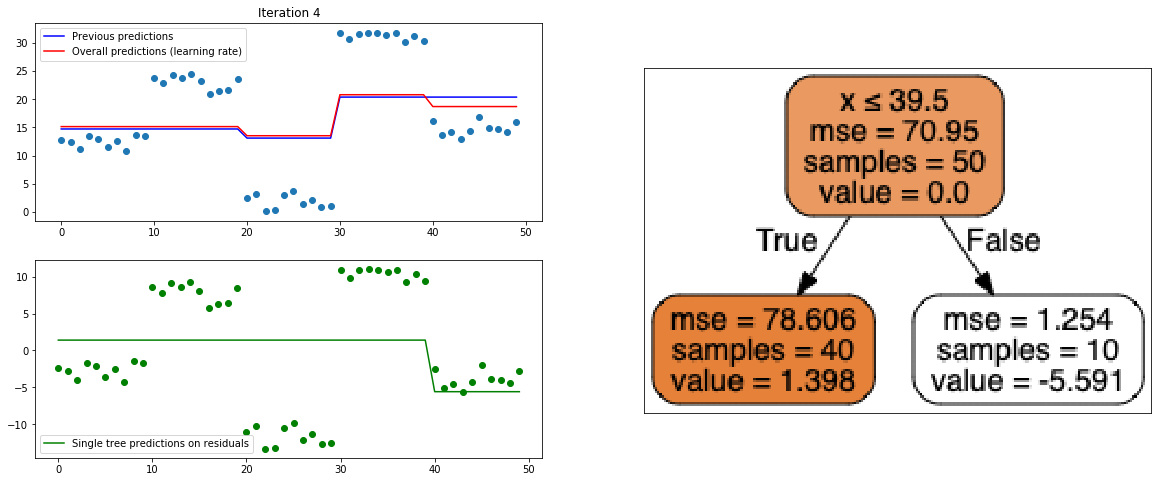

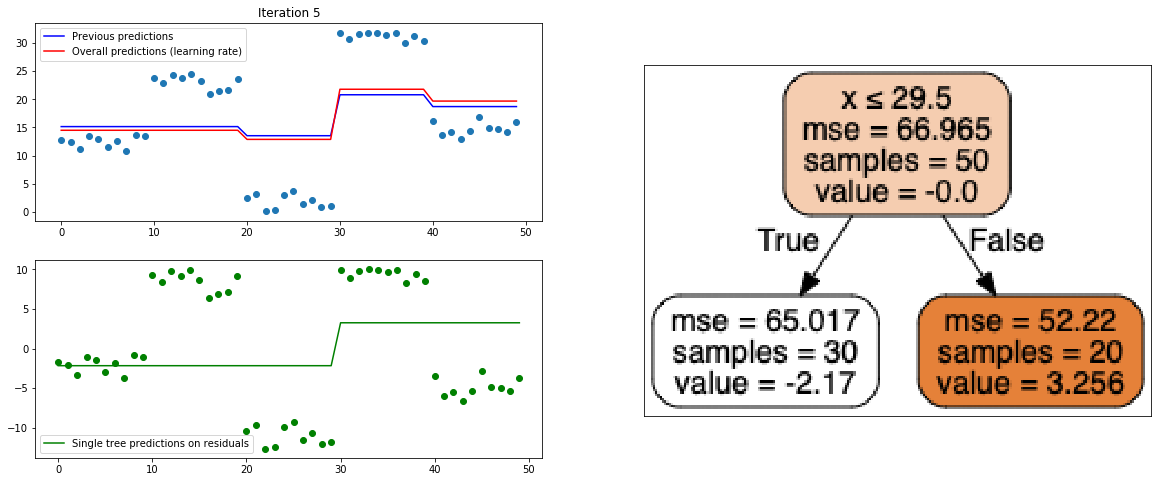

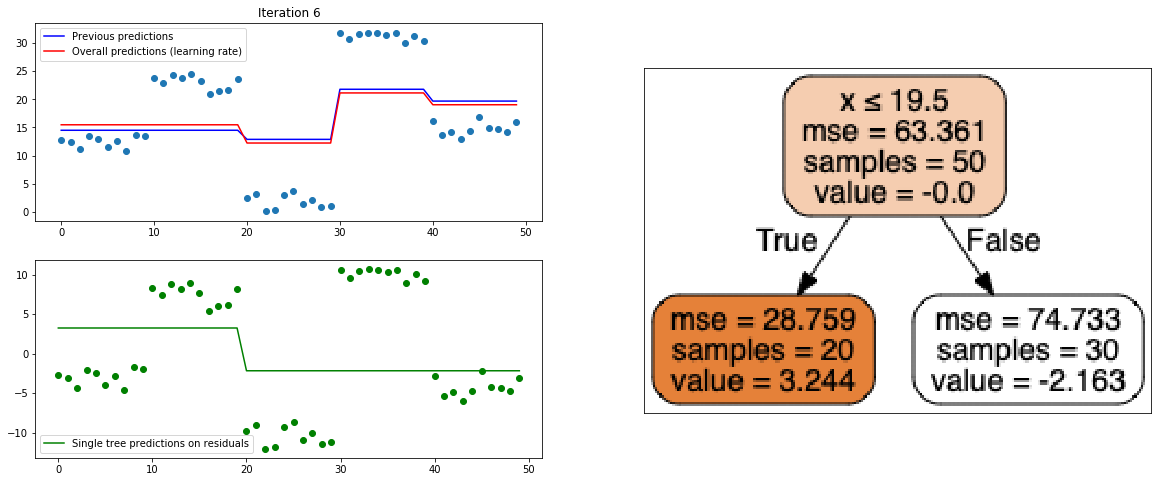

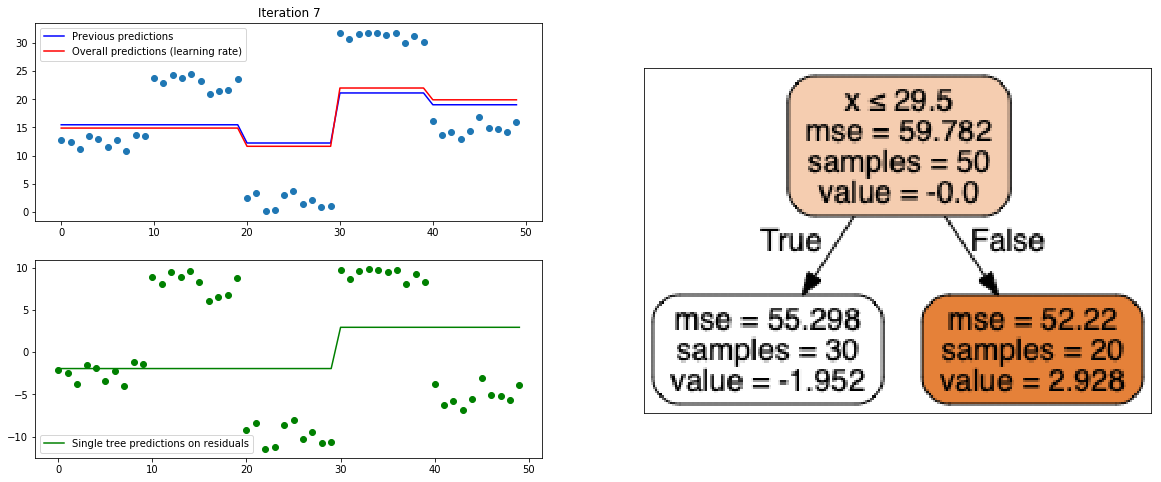

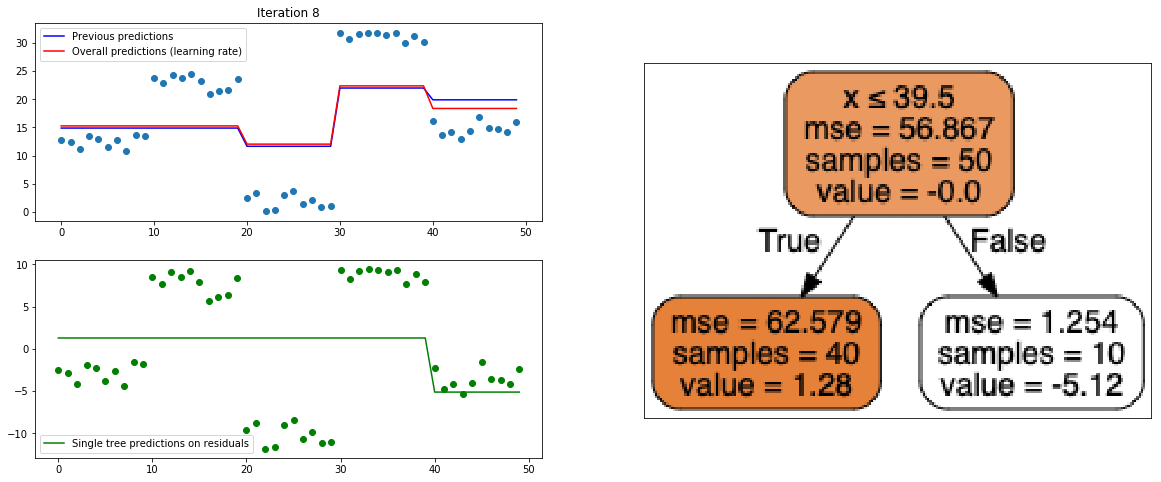

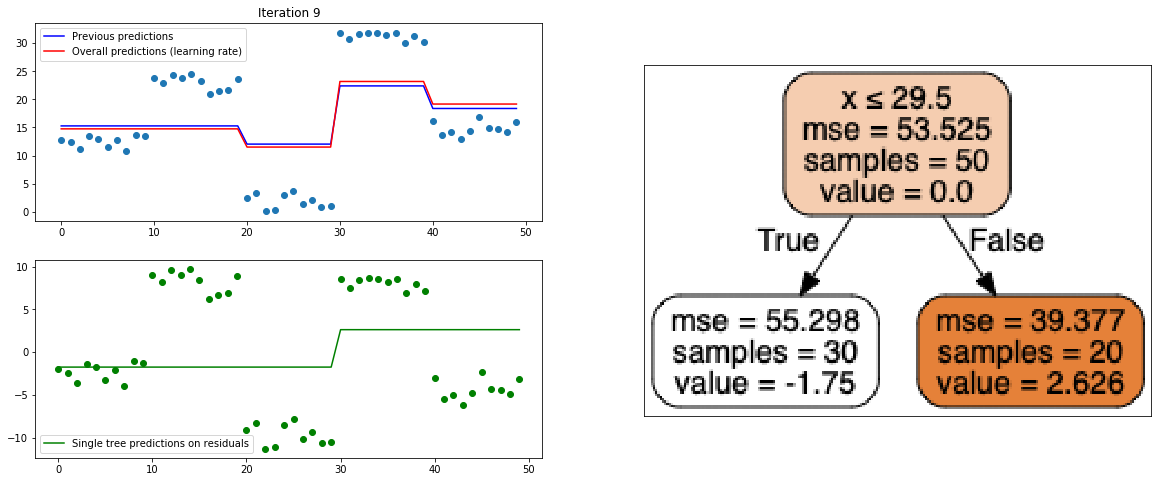

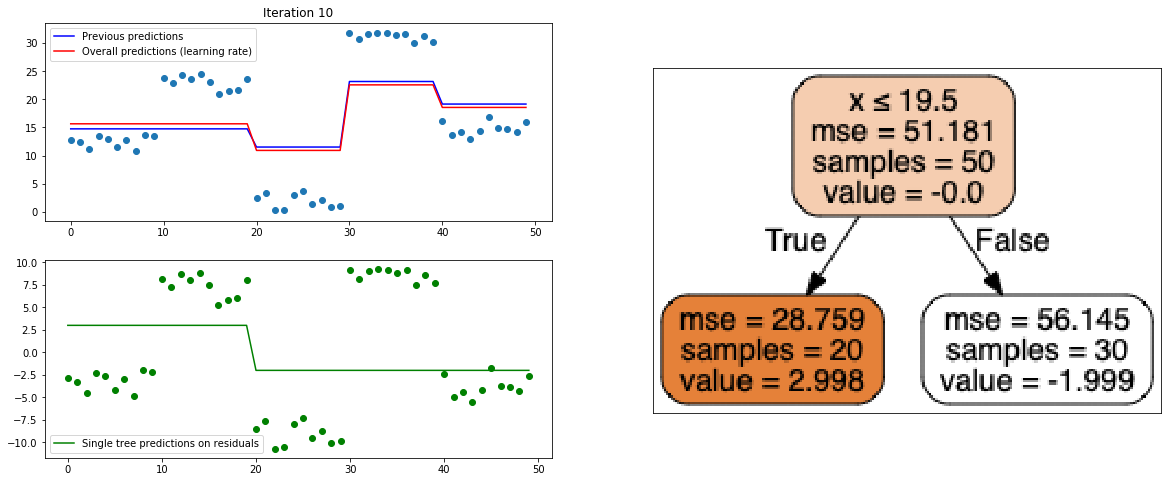

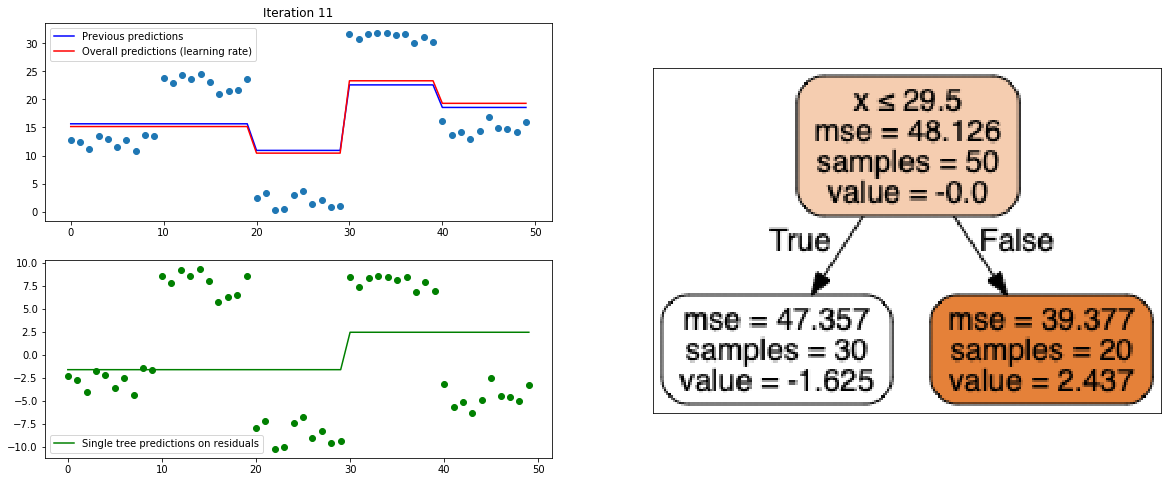

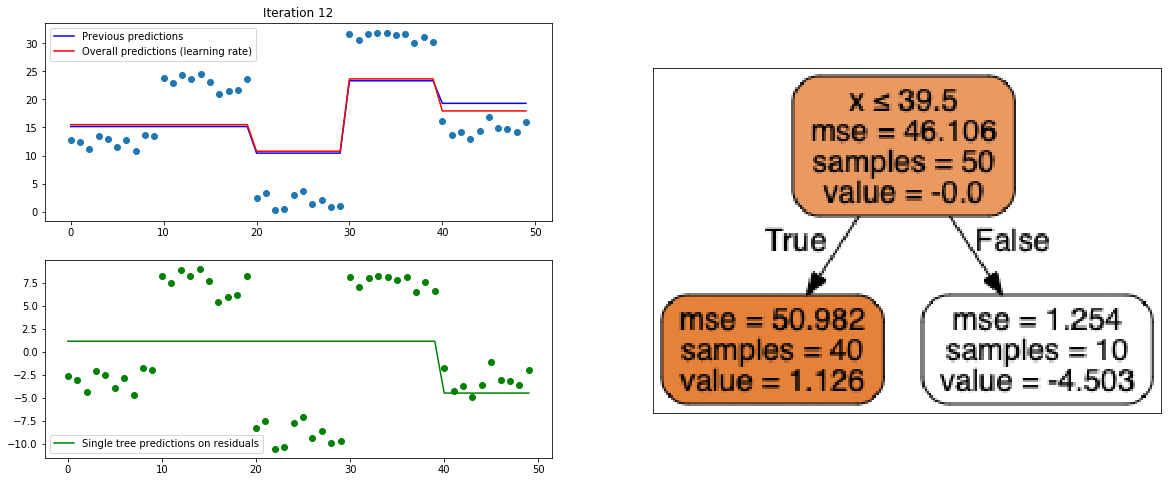

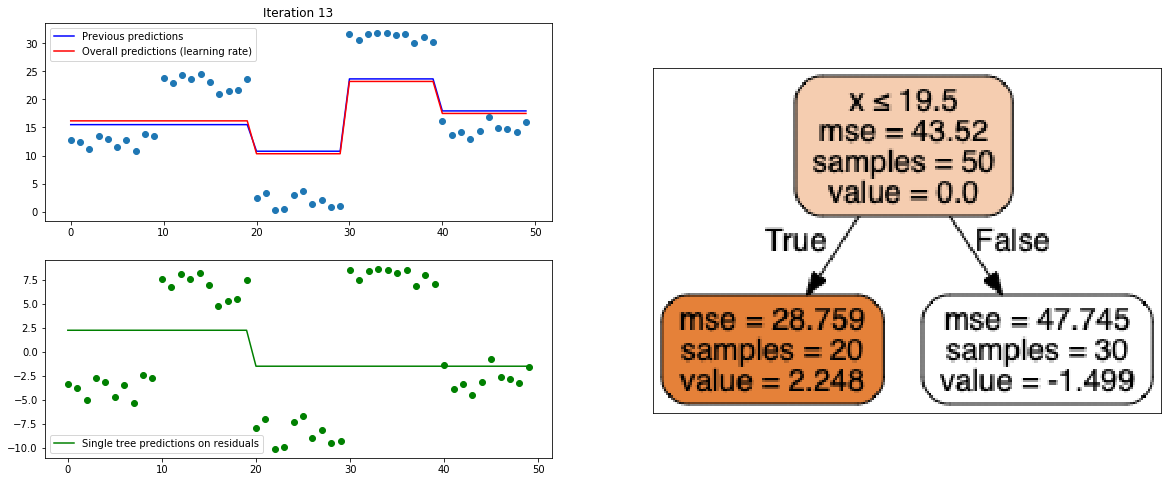

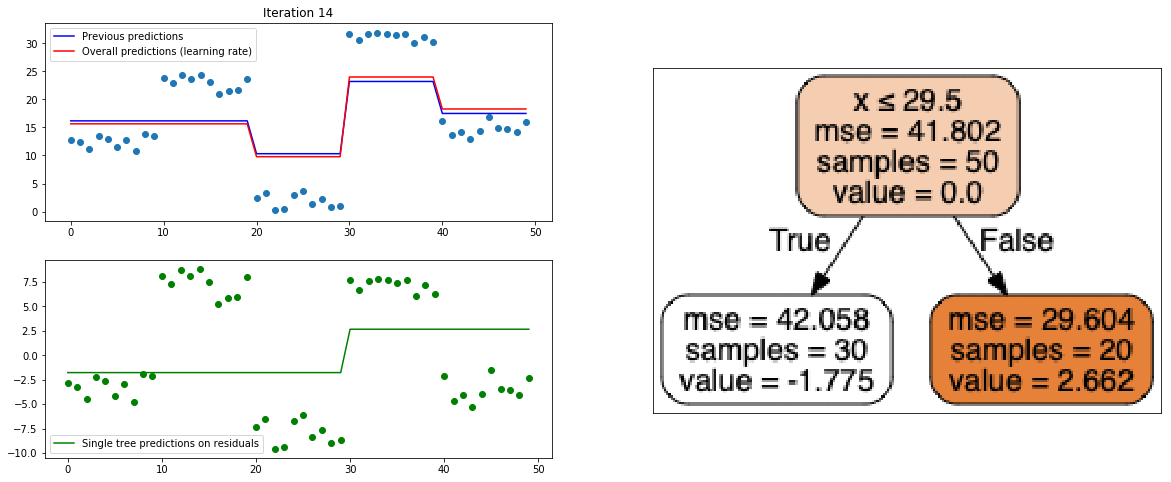

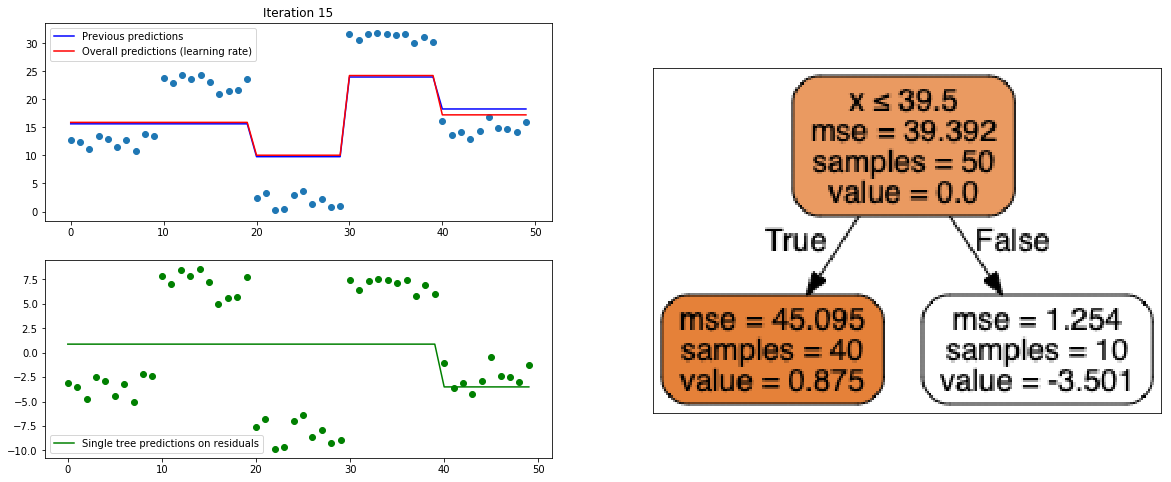

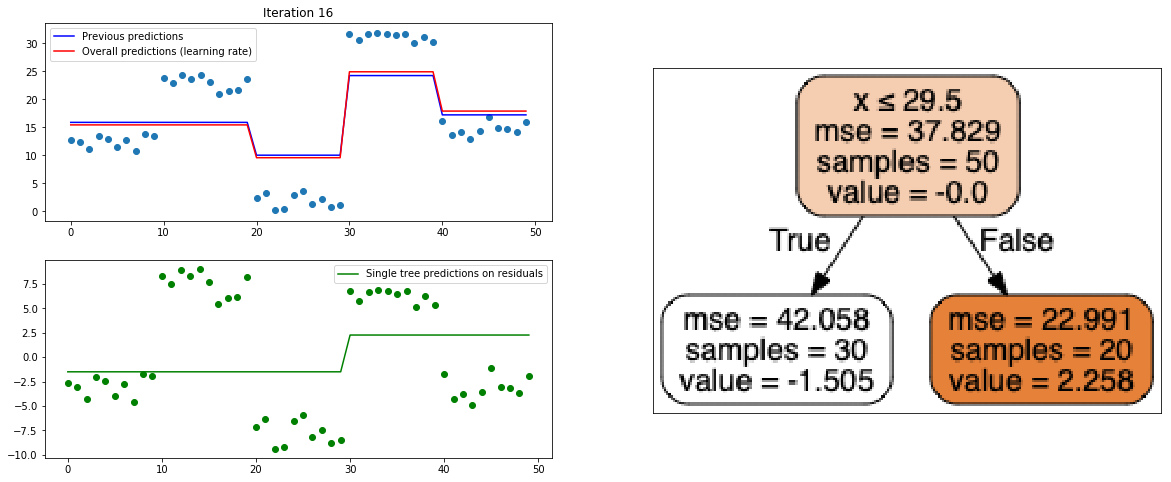

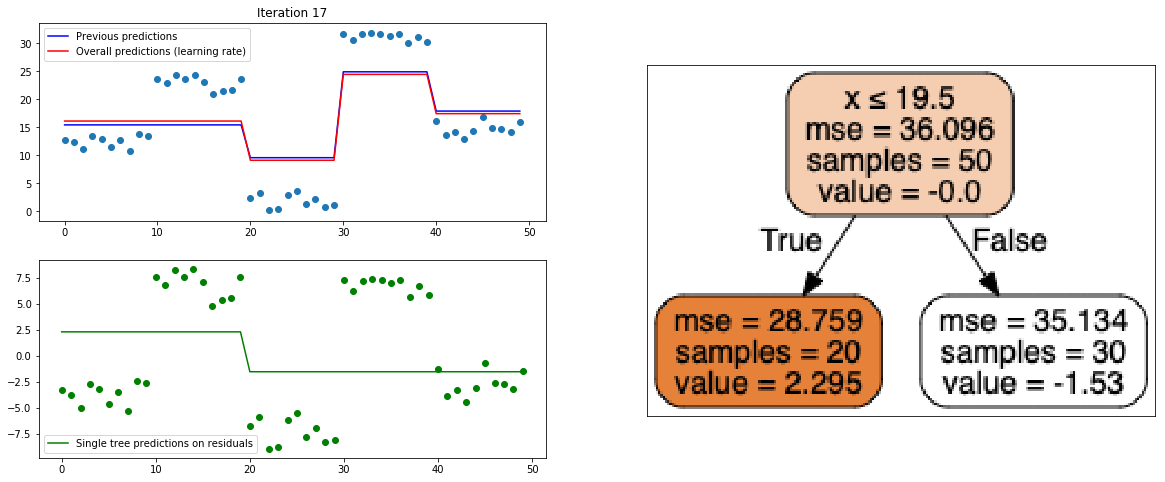

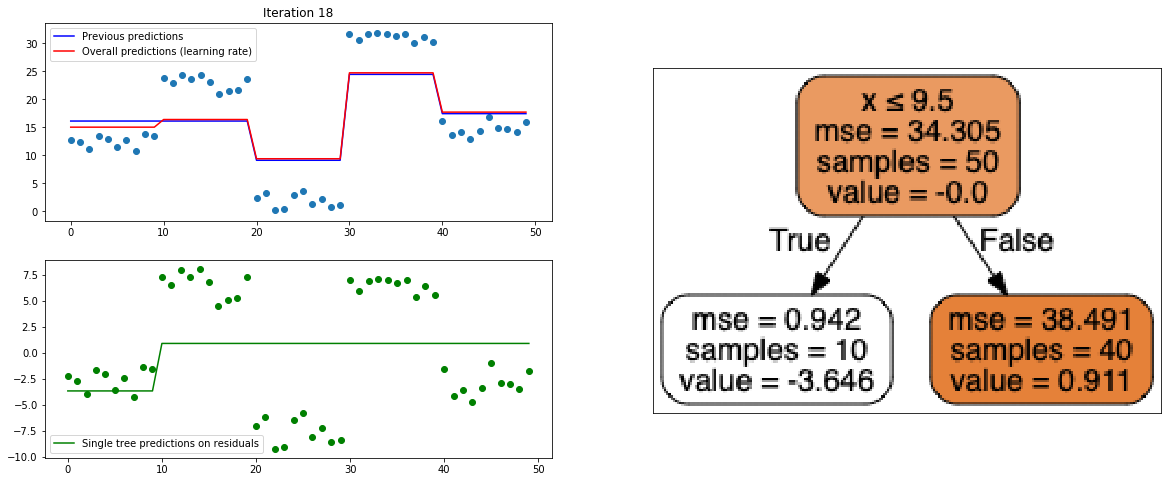

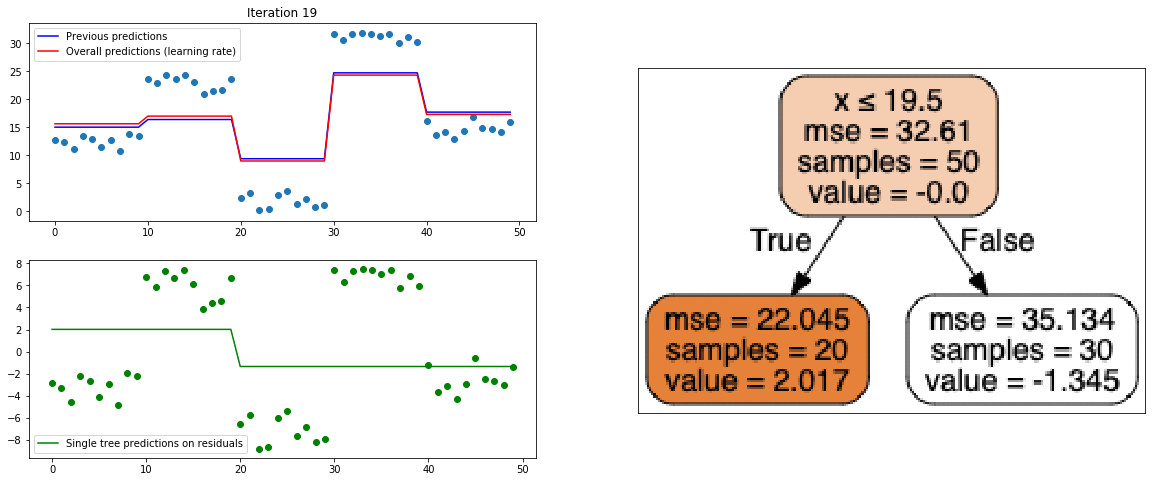

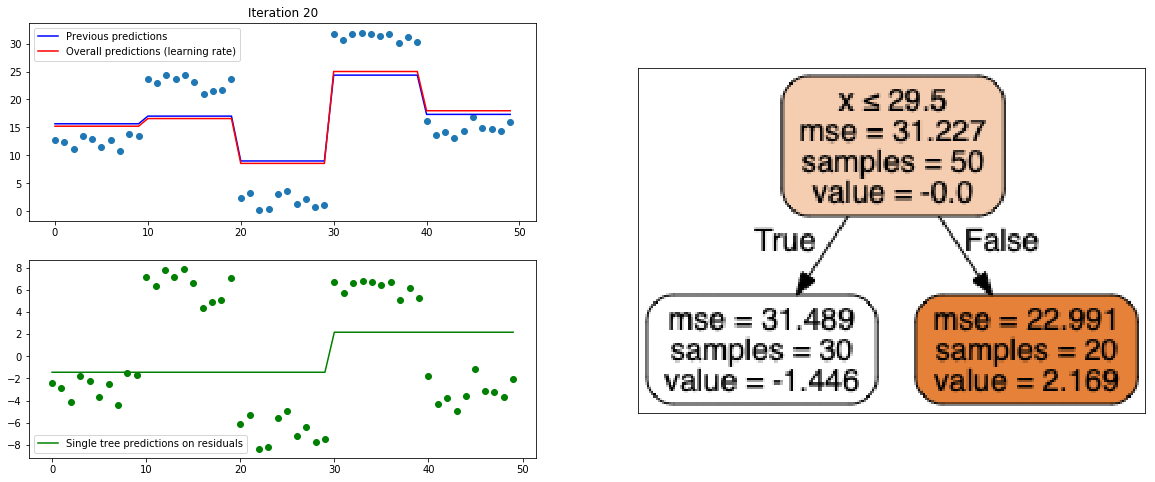

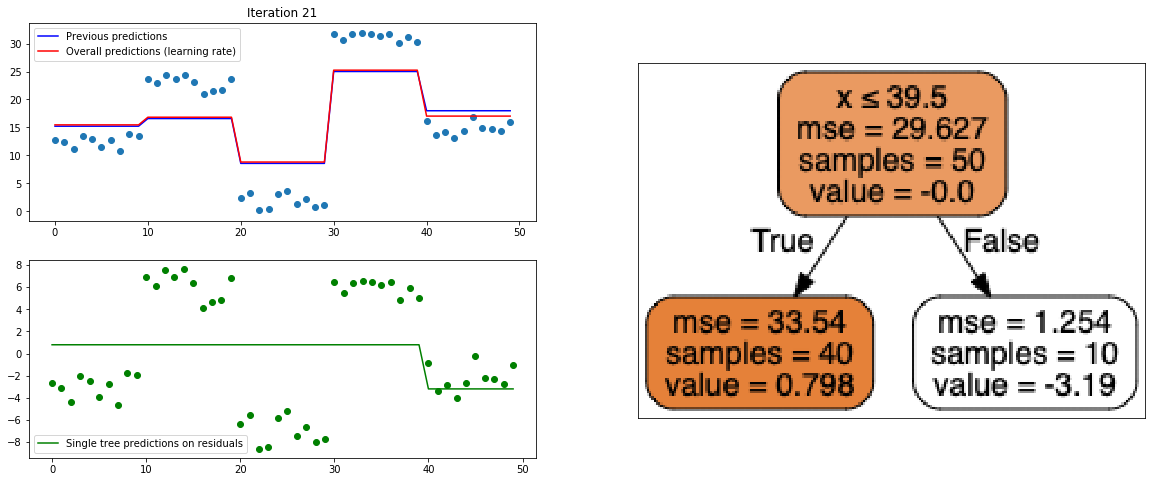

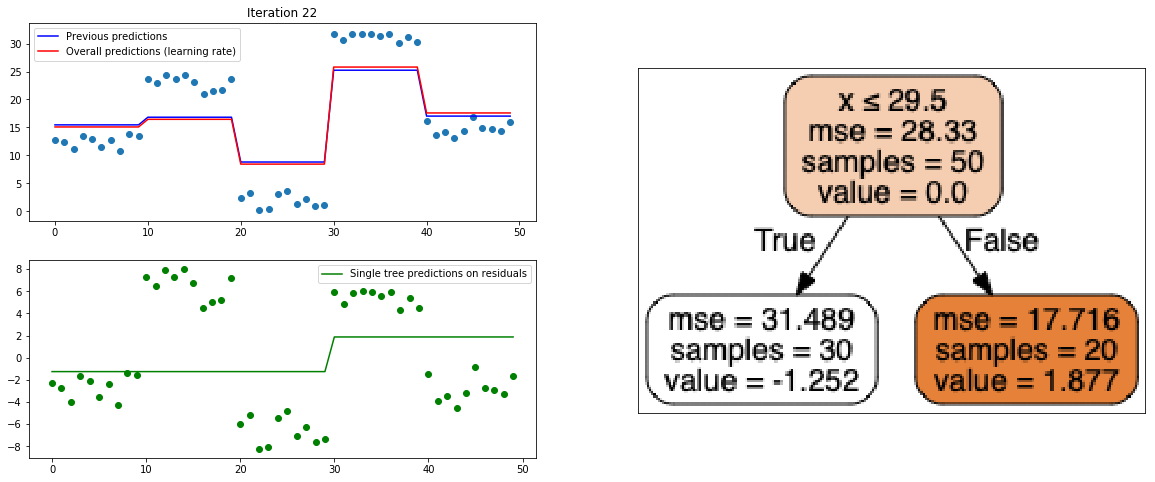

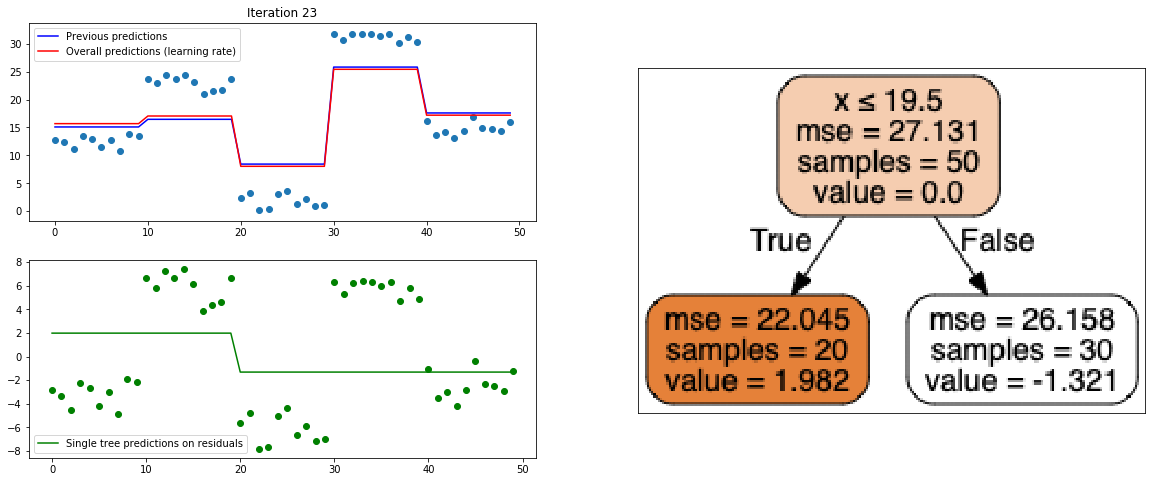

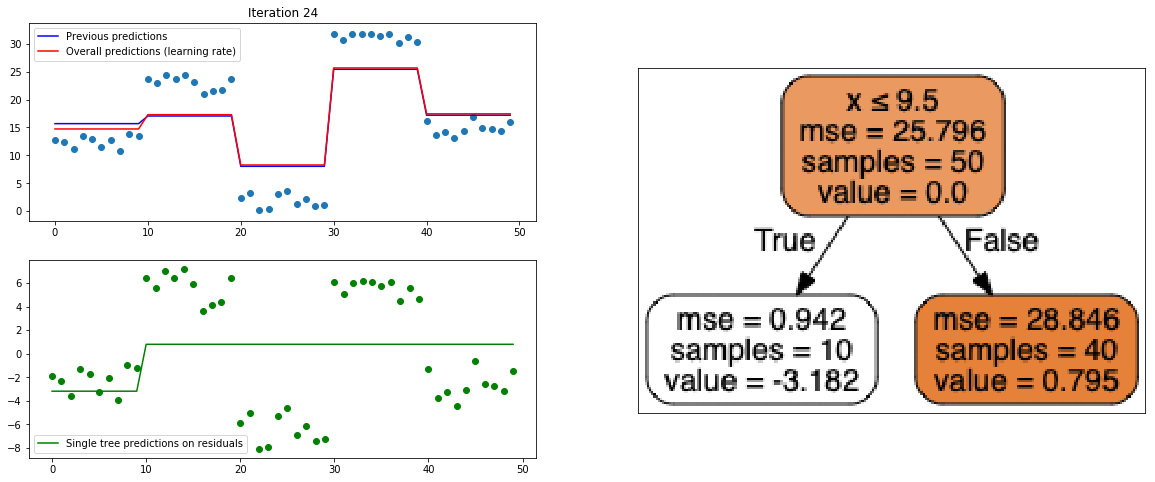

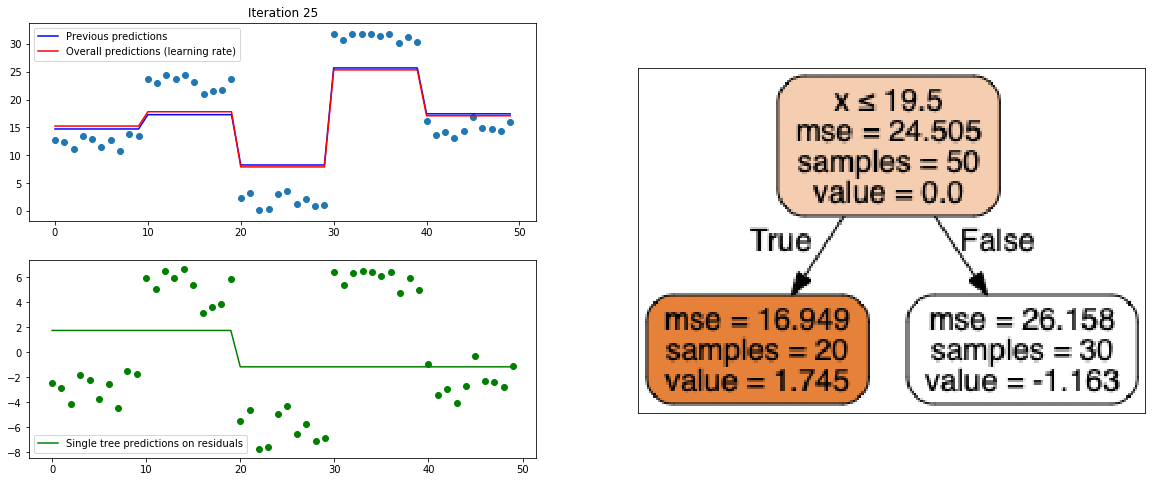

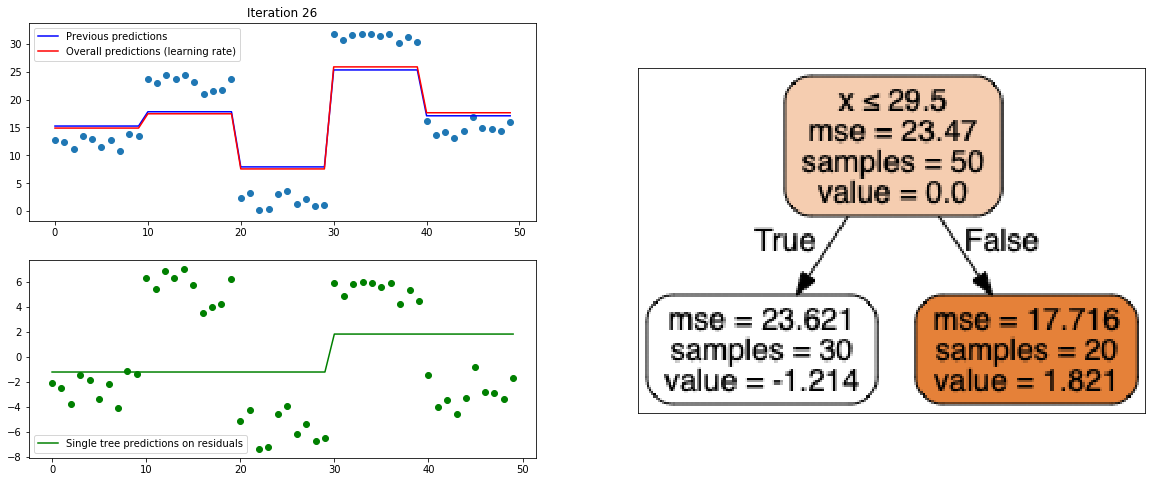

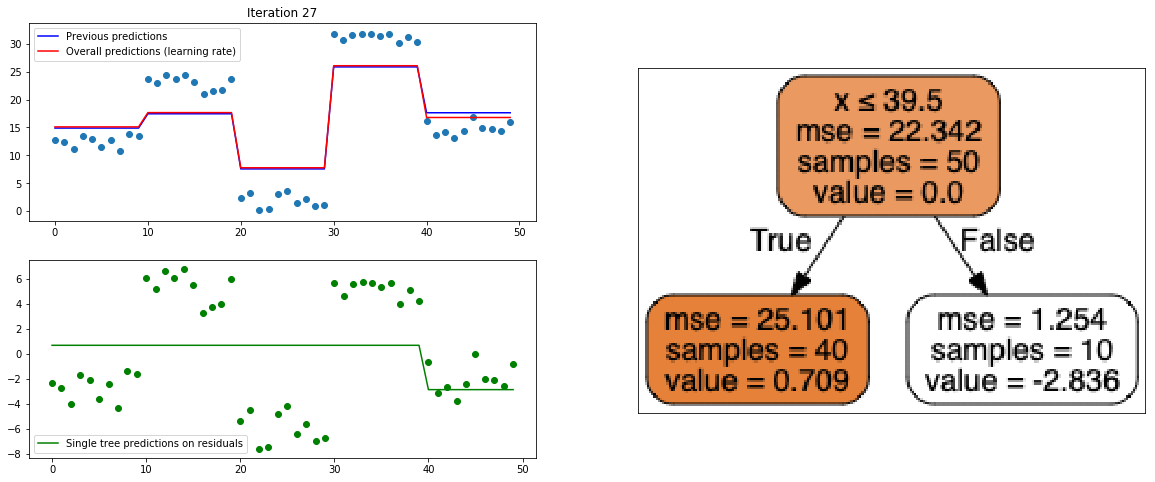

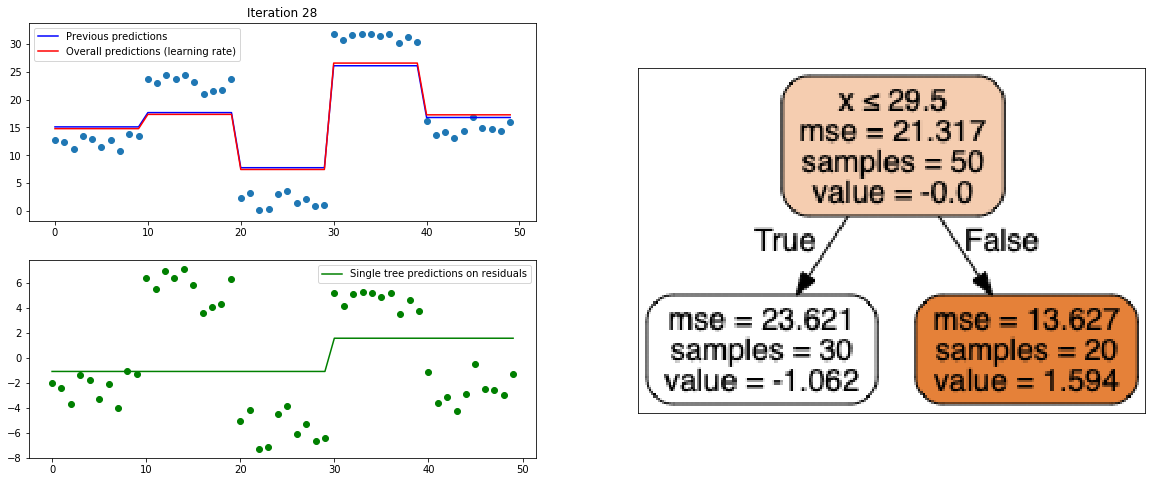

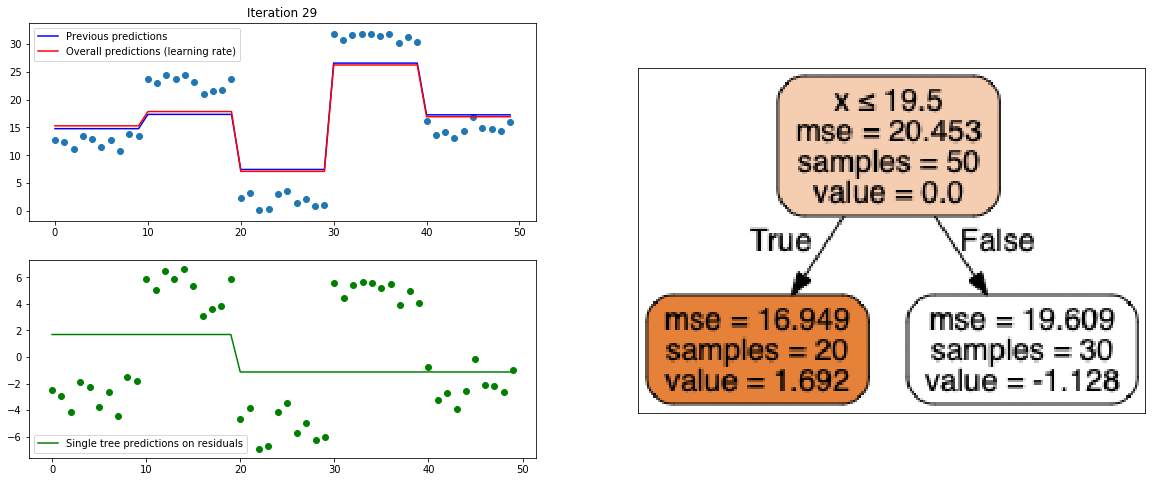

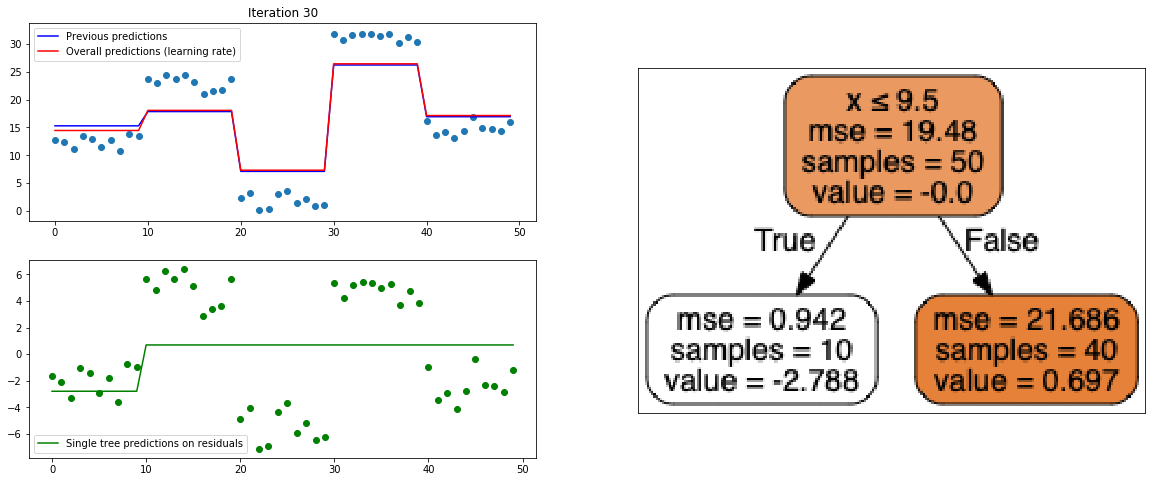

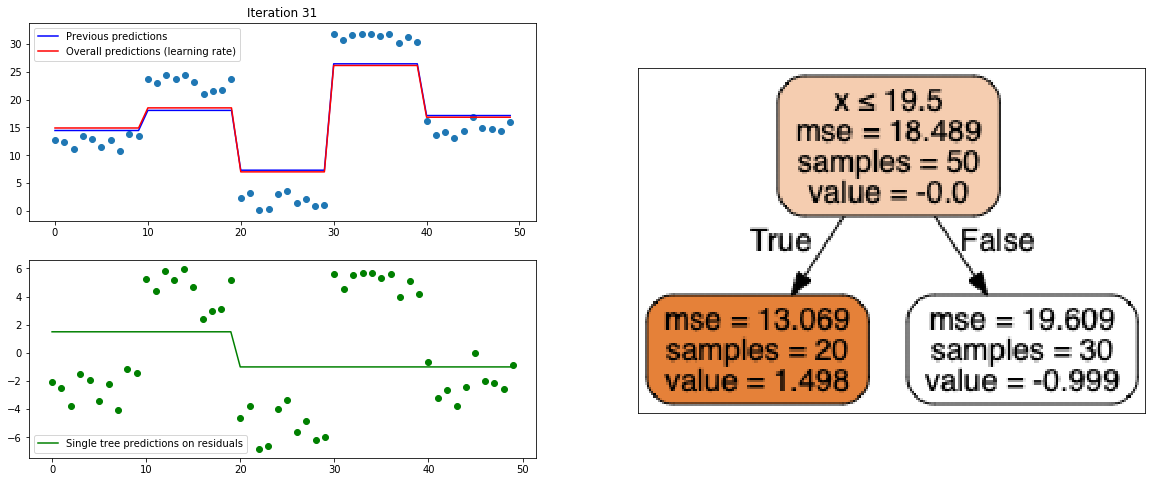

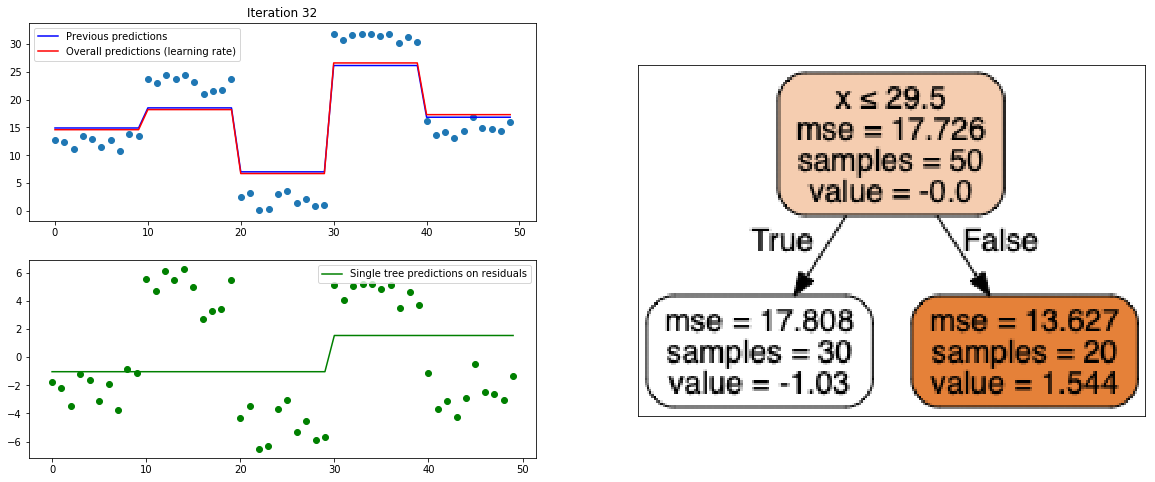

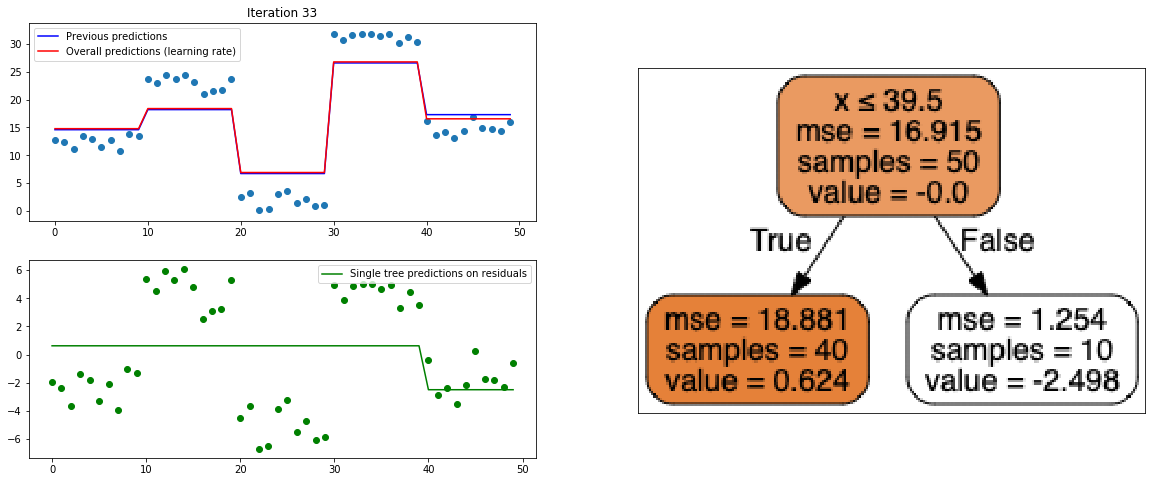

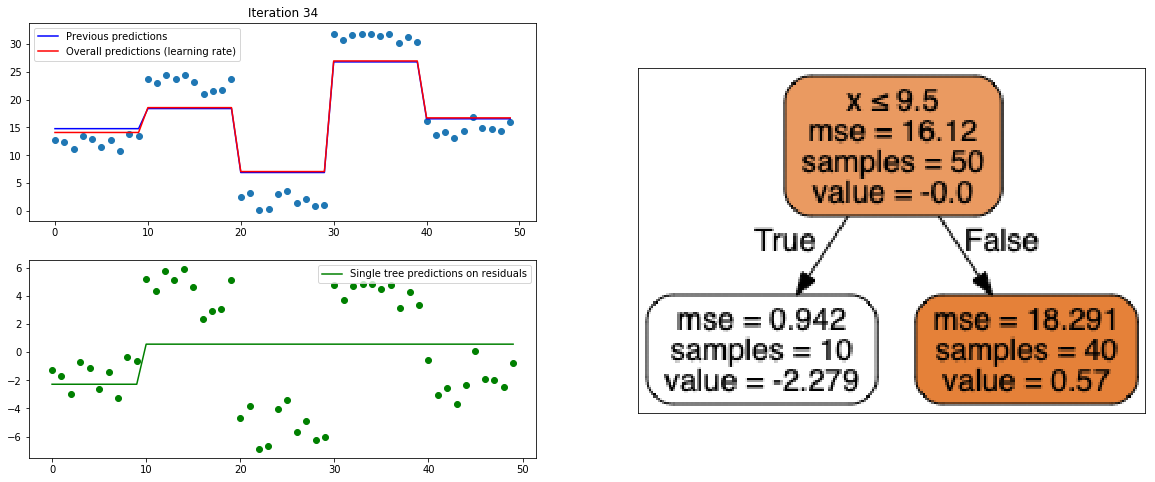

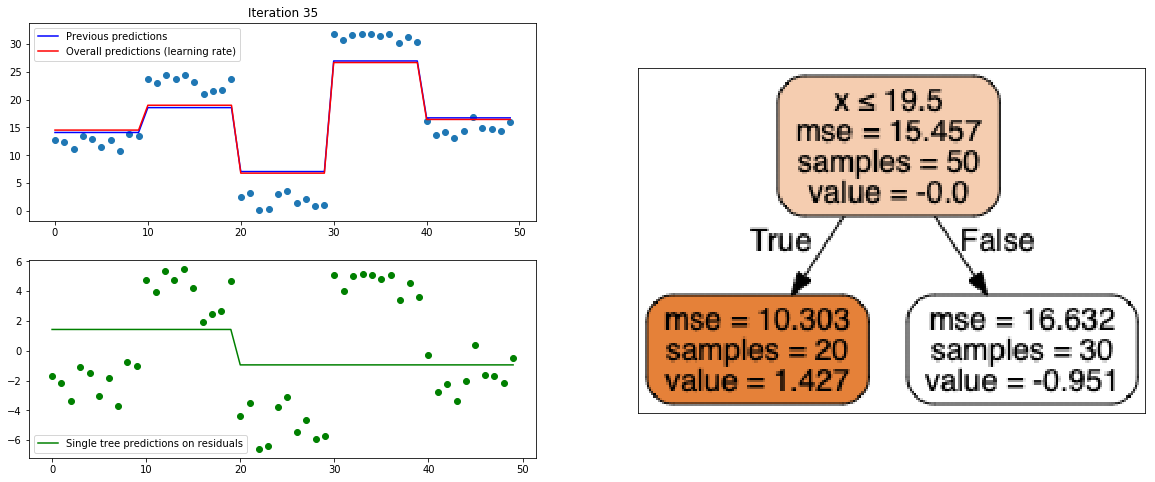

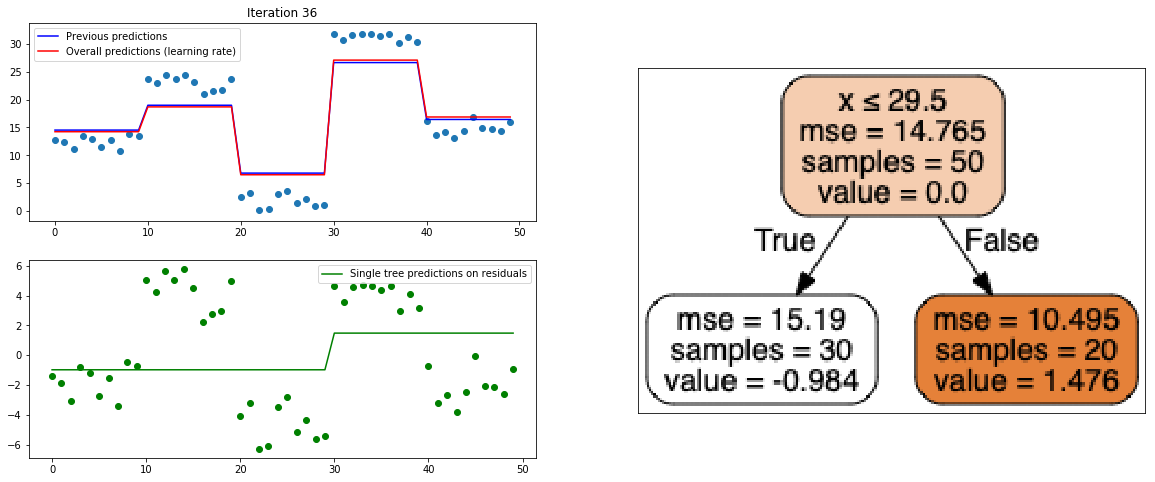

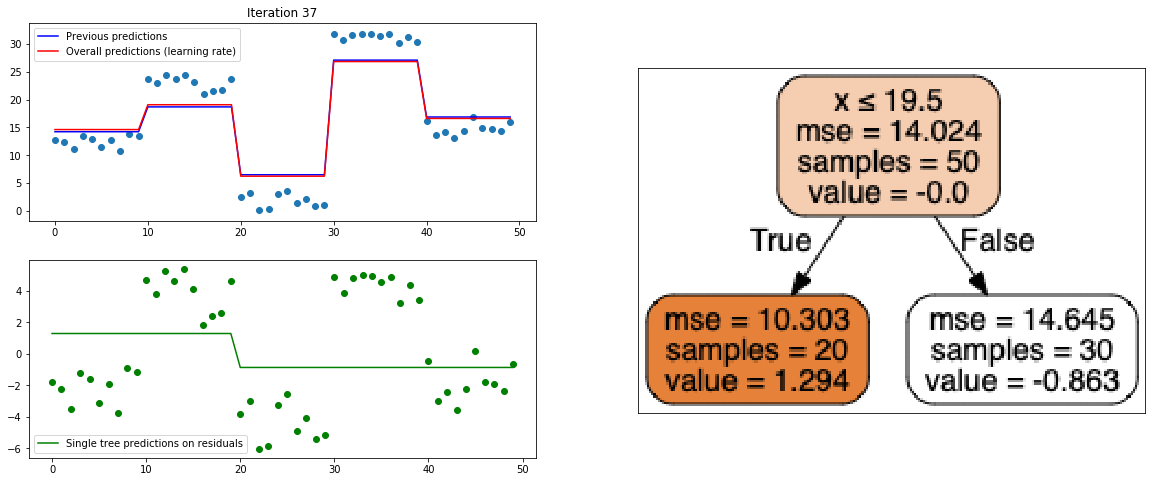

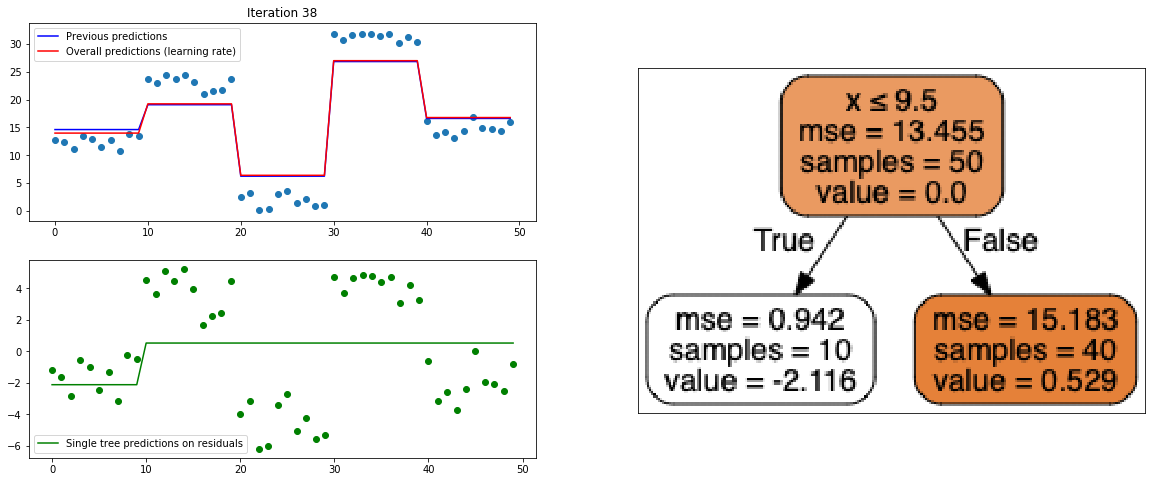

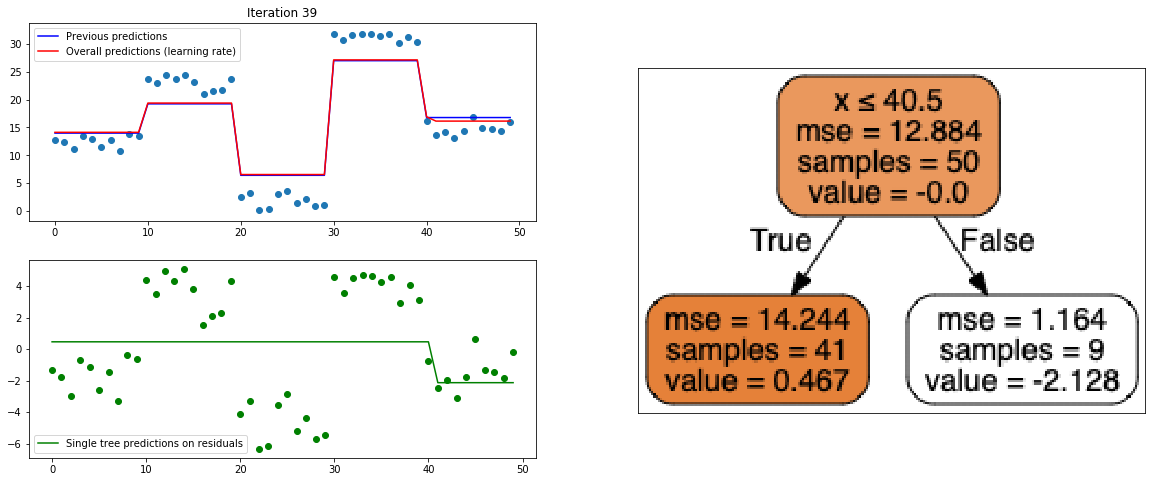

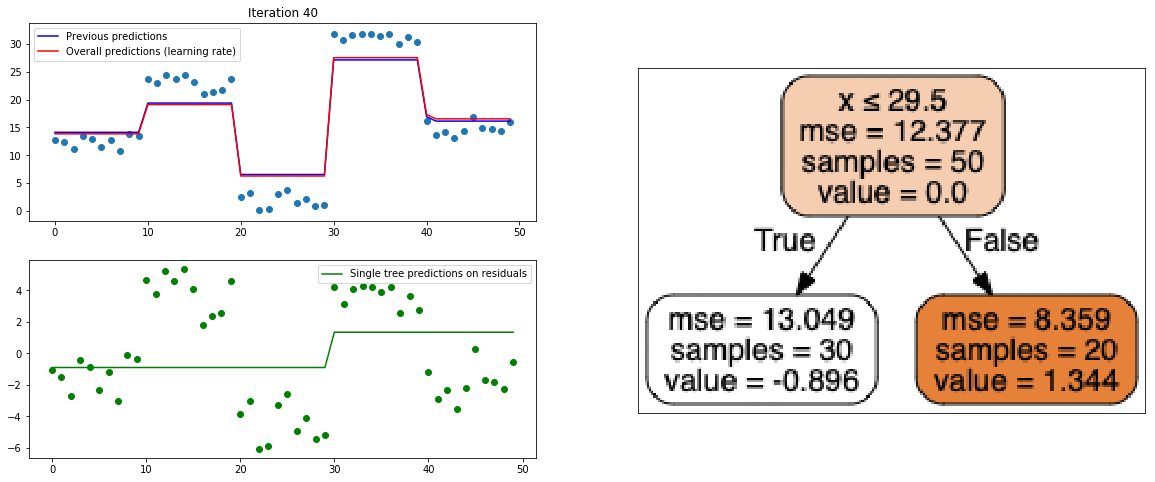

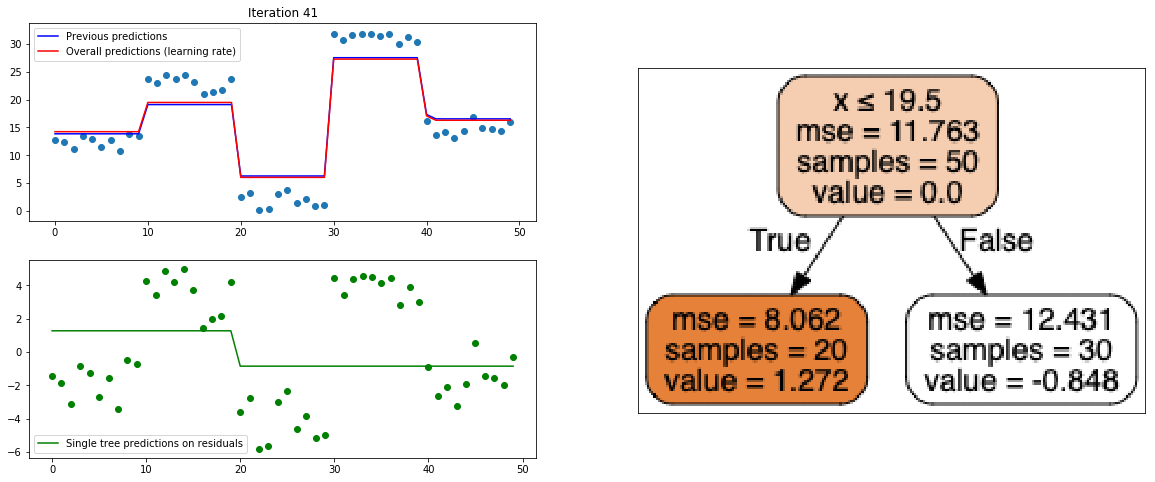

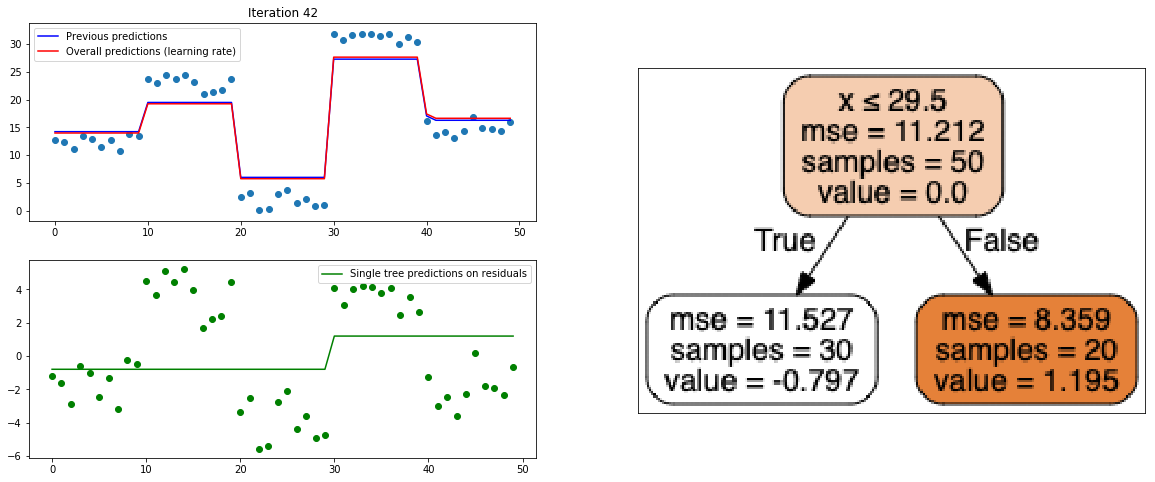

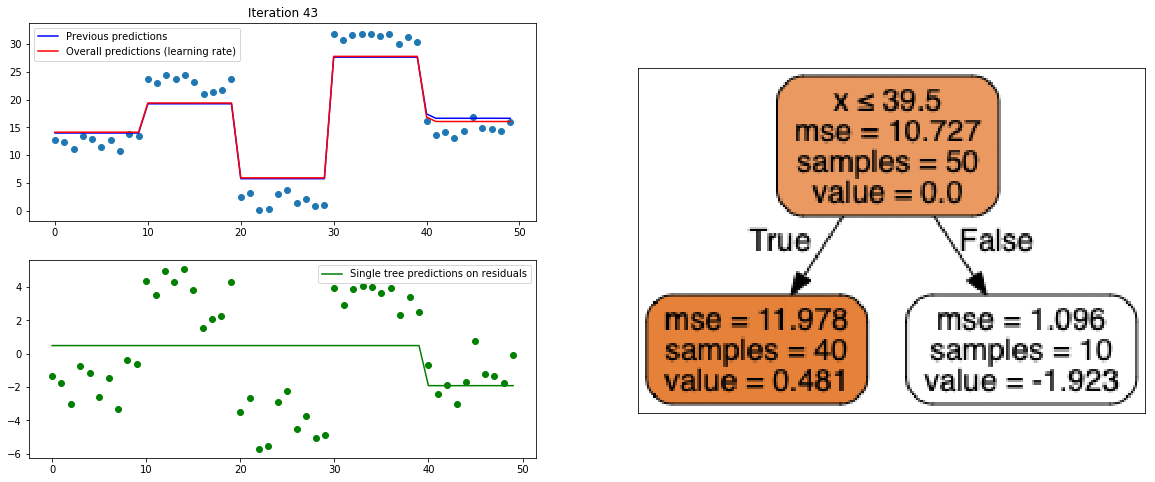

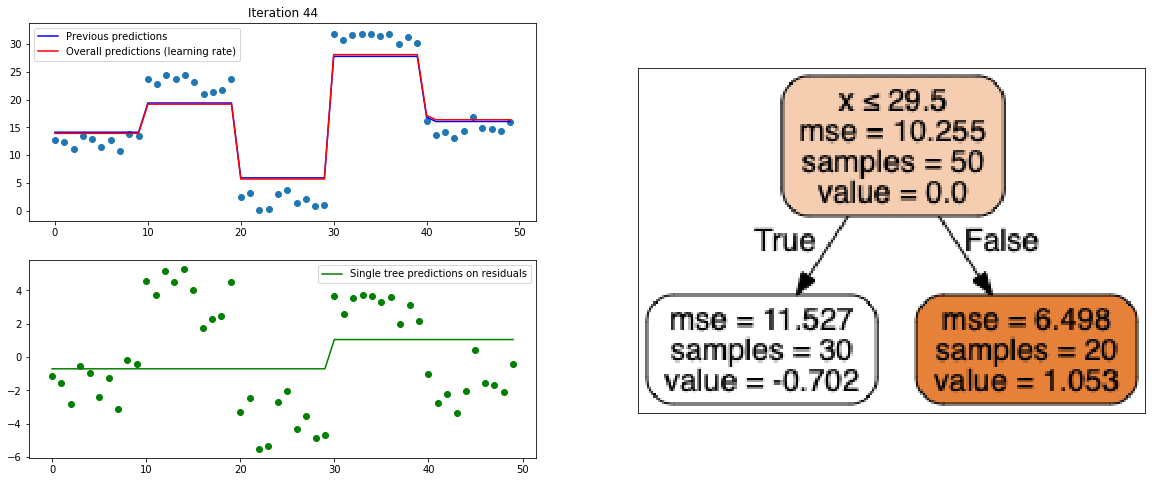

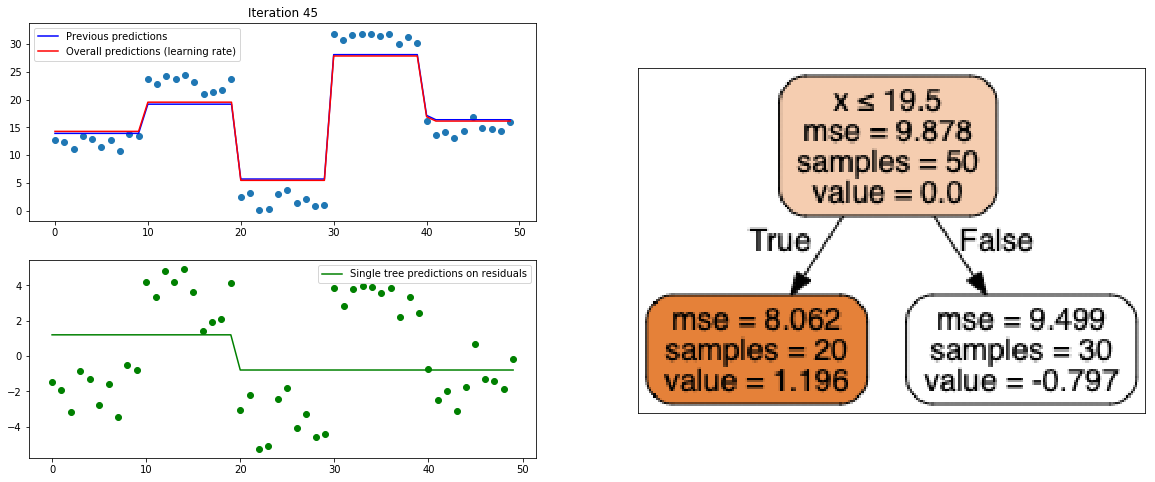

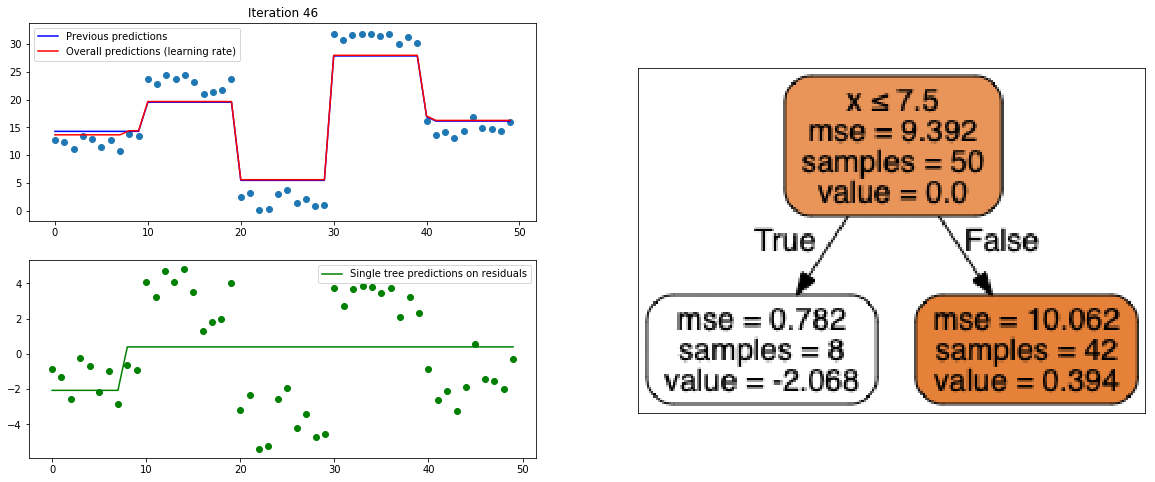

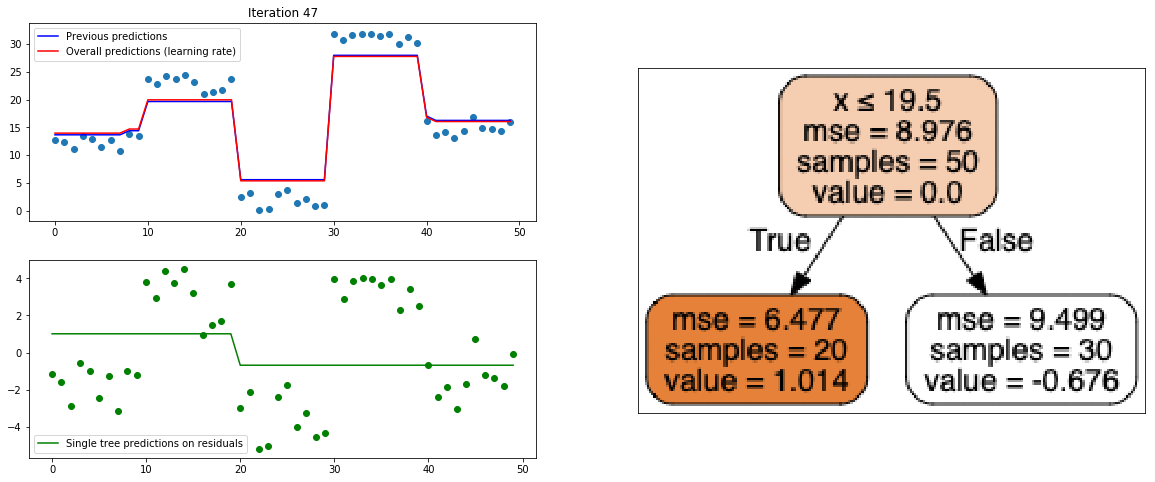

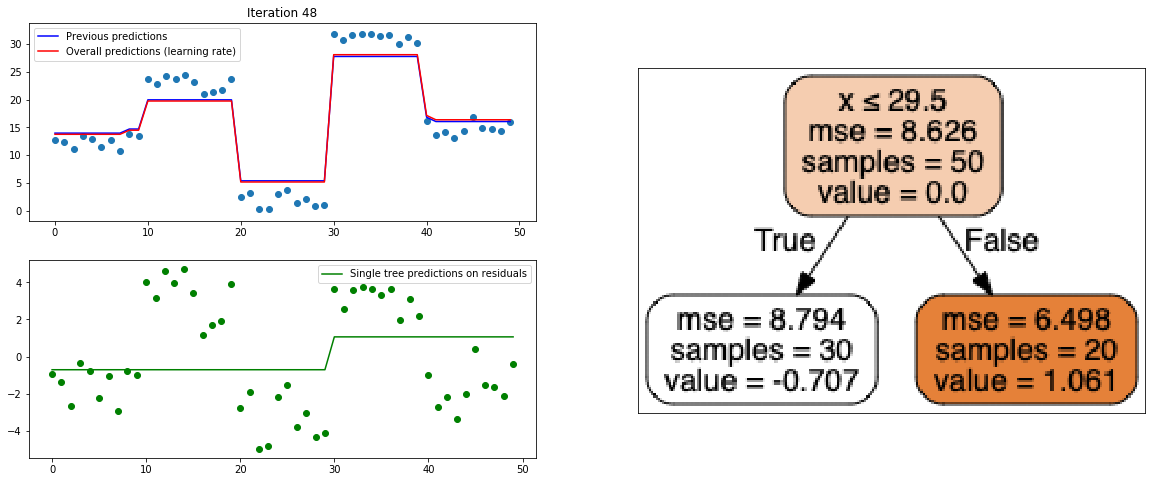

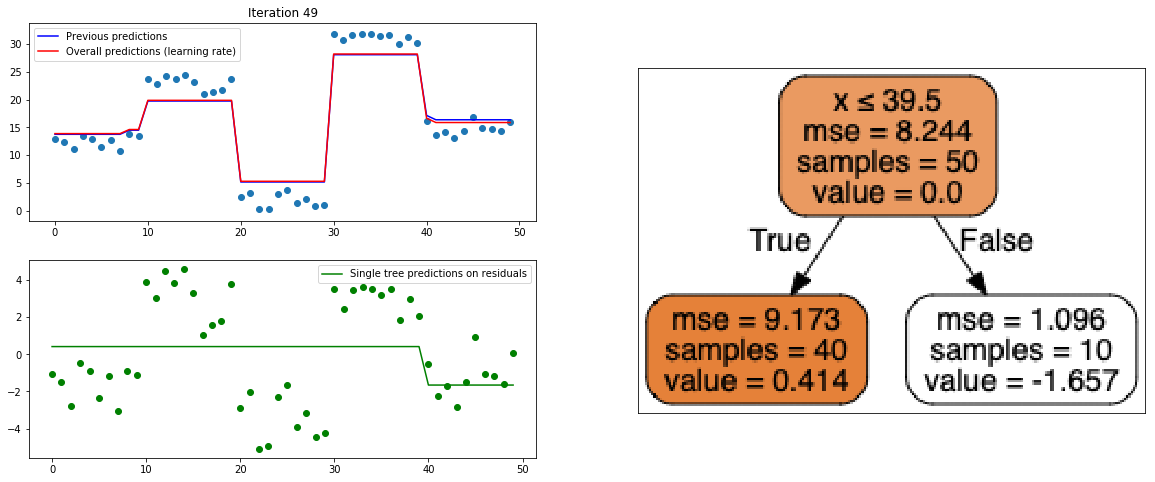

In [20]:
import imageio
import matplotlib.gridspec as gridspec

xi = x.copy()
yi = y.copy()

# Initialize predictions with average
predf = np.ones(len(yi)) * np.mean(yi)
# Compute residuals
ei = y.reshape(-1,) - predf
# Learning rate
lr = 0.3

# Iterate according to the number of iterations chosen
for i in range(50):
    # Fit the a stump (max_depth = 1) on xi, ei
    clf = tree.DecisionTreeRegressor(max_depth=1)
    model = clf.fit(xi, ei)
    # Use the fitted model to predict yi
    predi = model.predict(xi)
    
    # Final predictions
    pred_new = predf + lr * predi
    # Compute the new residuals, 
    ei = y.reshape(-1,) - pred_new

    # Every iteration, plot the prediction vs the actual data
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(2, 2)


    fig, axes = plt.subplots(figsize=(20,8))
    plt.subplot(gs[0, 0])
    plt.plot(x, predf, c='b', label="Previous predictions")
    plt.plot(x, pred_new, c='r', label='Overall predictions (learning rate)')
    plt.scatter(x, y)
    plt.title("Iteration " + str(i))
    plt.legend()


    axis = plt.subplot(gs[:, 1])
    #plt.gca().set_aspect('equal', adjustable='datalim')
    plt.imshow(imageio.imread(create_tree_graph(clf)))
    axis.xaxis.set_visible(False)  # hide the x axis
    axis.yaxis.set_visible(False)  # hide the y axis
    
    plt.subplot(gs[1, 0])
    plt.scatter(x, ei,  c='g')
    plt.plot(x, predi, c='g', label='Single tree predictions on residuals')
    plt.legend()
    
    plt.savefig('bonus_ressources_gradient_boosting/iterations/imgs_iteration{}.png'.format(str(i).zfill(2)))
    plt.show()
    # update
    predf = pred_new

In [15]:
import os
os.getcwd()

'/Users/lucbertin/Desktop/TDs_Python_ESILV_5A'

In [21]:
!magick convert -delay 20 -loop 0 bonus_ressources_gradient_boosting/iterations/*.png bonus_ressources_gradient_boosting/gradient_boosting_animation.gif

<img src="bonus_ressources_gradient_boosting/gradient_boosting_animation.gif">

# Fin